<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguaje Natural

## Taller #7: Clasificación de textos
`Fecha de entrega: Abril 22, 2021. (Antes del inicio de la próxima clase).`

`Modo de entrega: Subir link de GitHub al aula virtual.`

In [1]:
import re
import json
import pandas as pd

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot

In [11]:
# Cargar datos

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0825565,product_es_0370490,reviewer_es_0174781,3,"Buen. Buena calidad, y buena presentación.",Contenta,es,jewelry
1,es_0227934,product_es_0354224,reviewer_es_0411613,3,"Un producto a perfecto, para salir de casa con...",Versatilidad,es,video_games
2,es_0468601,product_es_0665460,reviewer_es_0348315,1,No funciona con Nintendo Switch. No hay forma ...,Decepción absoluta,es,video_games
3,es_0814494,product_es_0692692,reviewer_es_0951508,5,"Recomendado, los utilizo para pc y no me dan n...",Auriculares Pecham ps4,es,video_games
4,es_0206329,product_es_0728826,reviewer_es_0493255,4,El cable funciona bien podria ser un poco mas ...,Perfecto,es,video_games


**OBJETIVO**
Predecir la categoria del producto(product_category) basados en los textos de los usuarios (review_body)

In [2]:
data = pd.read_csv("C:/Users/CHOMELY/Documents/1. Especialización Konrad Lorenz/1. Procesamiento de Lenguaje Natural (NLP)/Procesamiento-de-Lenguaje-Natural-NLP-/reviews_vidjew_es.csv")
data.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0825565,product_es_0370490,reviewer_es_0174781,3,"Buen. Buena calidad, y buena presentación.",Contenta,es,jewelry
1,es_0227934,product_es_0354224,reviewer_es_0411613,3,"Un producto a perfecto, para salir de casa con...",Versatilidad,es,video_games
2,es_0468601,product_es_0665460,reviewer_es_0348315,1,No funciona con Nintendo Switch. No hay forma ...,Decepción absoluta,es,video_games
3,es_0814494,product_es_0692692,reviewer_es_0951508,5,"Recomendado, los utilizo para pc y no me dan n...",Auriculares Pecham ps4,es,video_games
4,es_0206329,product_es_0728826,reviewer_es_0493255,4,El cable funciona bien podria ser un poco mas ...,Perfecto,es,video_games


In [6]:
data.keys()

Index(['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body',
       'review_title', 'language', 'product_category'],
      dtype='object')

### `[8 pts]` Punto 1: Dividir el conjunto de datos en entrenamiento y prueba

**DATOS BALANCEADOS?**

In [29]:
data.product_category.value_counts()

jewelry        502
video_games    498
Name: product_category, dtype: int64

In [3]:
train, test = train_test_split(data, test_size=0.2, random_state=42) #0.2 tamaño muestra random_state=42 -semilla
print(f"Tenemos {data.shape[0]} datos en total.")

Tenemos 1000 datos en total.


In [4]:
print(f"El conjunto de datos de entrenamiento (train) tiene {train.shape[0]} datos.") #80%
print(f"El conjunto de datos de prueba (test) tiene {test.shape[0]} datos.")# 20%

El conjunto de datos de entrenamiento (train) tiene 800 datos.
El conjunto de datos de prueba (test) tiene 200 datos.


###  `[8 pts]` Punto 2: Hacer pre-procesamiento del texto

In [5]:
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
stopwords_sp = stopwords.words('spanish')

def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = texto.split() # Tokenizar
    texto = [palabra for palabra in texto if palabra not in stopwords_sp] 
    texto = " ".join(texto)
    return texto

pre_procesado("¡¡¡HOLA !!!! COMO COMO PERRO ESTAS?? Espero que muy bien:-23243")

'hola perro espero bien'

In [8]:
tfidf_vect = TfidfVectorizer(preprocessor=pre_procesado) #para el preprocesador de texto y transformación numerica
#pasar del preprocesado a pasarlo a valores numericos
tfidf_vect.fit(train.review_body.values); #enviar directamente a tfidf con el preprocessor sobr

In [9]:
X_train = tfidf_vect.transform(train.review_body.values) #fit transform entrena los datos y despues se transforma, lee lo que esta en xtrain y hace la conversion de las palabras
y_train = train.product_category.values #transform todo tenga el mismo preprocesamiento tanto los datos de test y train

X_test = tfidf_vect.transform(test.review_body.values) # sobre las palabras que el modelo conoce ya
y_test = test.product_category.values

print(f"Tamaño de X_train (entrenamiento): {pd.DataFrame(X_train.toarray()).shape}")
print(f"Tamaño de X_test (prueba): {pd.DataFrame(X_test.toarray()).shape}")
print(f"Tamaño de y_train {len(y_train)} y tamaño de y_test {len(y_test)}")

Tamaño de X_train (entrenamiento): (800, 3221)
Tamaño de X_test (prueba): (200, 3221)
Tamaño de y_train 800 y tamaño de y_test 200


In [25]:
#print(pd.DataFrame(X_train.toarray()))
#print(pd.DataFrame(X_test.toarray()))
#print(X_train)
#print(y_train)
#print(X_test)
#print(y_test)

###  `[10 pts]` Punto 3: Entrenar el modelo
Puedes escoger el que quieras: Regresión Logística, Naive-Bayes, SVM, Árbol de Decisión, u otro.

In [26]:
from sklearn.naive_bayes import MultinomialNB 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

In [27]:
data.product_category.value_counts(normalize=True) #Están balanceados a la clase jewelry 50% y video_games 49%

jewelry        0.502
video_games    0.498
Name: product_category, dtype: float64

In [31]:
# Inicializar los clasificadores
nb = MultinomialNB() #nb ingenuo de bayes
logreg = LogisticRegression(class_weight='balanced')  #logreg regresion logistica, 
svm = LinearSVC(class_weight='balanced')
dt = DecisionTreeClassifier(class_weight='balanced')

#parametro class_weight si nuestra clase no esta balanceada el automaticamente intenta balancear la clase

In [32]:
# Entrenamos los cuatro modelos
nb.fit(X_train, y_train) #fit que esta haciendo algun tipo de entrenamiento
logreg.fit(X_train, y_train)
svm.fit(X_train, y_train)
dt.fit(X_train, y_train);

In [33]:
y_pred_nb = nb.predict(X_test) #Va a hacer una prediccion nb ingenuo de bayes
y_pred_logreg = logreg.predict(X_test)  #logreg regresion logistica
y_pred_svm = svm.predict(X_test) #support vector mchine
y_pred_dt = dt.predict(X_test) #árbol de decision

In [38]:
#y_pred_logreg.shape

(200,)

###  `[10 pts]` Punto 4: Métricas de evaluación
Exactitud, precisión y sensibilidad

In [52]:
print(f"Naive Bayes: {accuracy_score(y_test, y_pred_nb):>15.2f}") #>15 espacioo de 15 y .2f redondear
print(f"Regresión Logística: {accuracy_score(y_test, y_pred_logreg):>7.2f}")
print(f"SVM: {accuracy_score(y_test, y_pred_svm):>23.2f}")
print(f"Árbol de decisión: {accuracy_score(y_test, y_pred_dt):>9.2f}")

Naive Bayes:            0.86
Regresión Logística:    0.86
SVM:                    0.84
Árbol de decisión:      0.78


De acuerdo con  la exactitud los mejores modelo son Naive Bayes y Regresión Logística se continuará el análisis con estos.

In [53]:
print("Naive Bayes")
print(classification_report(y_test, y_pred_nb))
print()

print("Regresión Logística")
print(classification_report(y_test, y_pred_logreg))
print()


Naive Bayes
              precision    recall  f1-score   support

     jewelry       0.81      0.95      0.87        97
 video_games       0.94      0.79      0.86       103

    accuracy                           0.86       200
   macro avg       0.87      0.87      0.86       200
weighted avg       0.88      0.86      0.86       200


Regresión Logística
              precision    recall  f1-score   support

     jewelry       0.86      0.86      0.86        97
 video_games       0.86      0.86      0.86       103

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200




Exactitud: 0.86
precision_score: 0.86
recall_score: 0.86
f1_score: 0.86


###  `[BONUS: 3 pts]` Matriz de confusión

Text(0.5, 1.0, 'Regresión Logística')

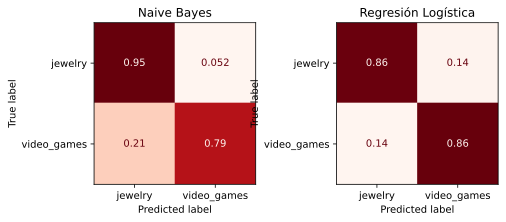

In [55]:
#visualizacion
%config InlineBackend.figure_format = 'svg' #otra funciones y no especificamente de python linea permite mejorar las imagenes para que se vean mejor

fig = plt.figure(figsize=(8,8)) #figura de 10 x 10 ax1, 

ax1 = fig.add_subplot(1,2,1) #dos filas y dos columnas 1 la primera casilla
plot_confusion_matrix(nb, X_test, y_test, cmap="Reds", ax=ax1, normalize='true').im_.colorbar.remove()
plt.title("Naive Bayes")

ax2 = fig.add_subplot(1,2,2) #dos filas y dos columnas 1 la segunda casilla
plot_confusion_matrix(logreg, X_test, y_test, cmap = 'Reds', ax=ax2, normalize='true').im_.colorbar.remove()
plt.title("Regresión Logística")




Text(0.5, 1.0, 'Regresión Logística')

<Figure size 1080x1080 with 0 Axes>

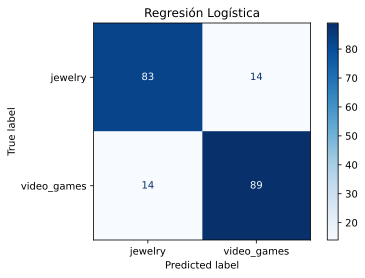

###  `[12 pts]` Punto 5: Términos más importantes de cada categoría

In [44]:
tfidf_vect.vocabulary_.items() #teneoms nuestro objeto vectorizador y neustro vocabulario TRANFORMAR DE DICCIONARIO A TUPLA
#llaves palabras y valores lo que se quiere es invertirlo

dict_items([('mismísimo', 1897), ('juego', 1637), ('ordenador', 2077), ('creía', 685), ('mejorado', 1840), ('gráficos', 1424), ('bien', 294), ('queda', 2466), ('corto', 670), ('ahora', 103), ('primera', 2366), ('vez', 3144), ('compro', 583), ('amazon', 149), ('ultima', 3051), ('sido', 2777), ('perfecta', 2213), ('buenas', 334), ('compramos', 568), ('colgante', 517), ('forma', 1312), ('corazón', 652), ('salido', 2717), ('defectuoso', 773), ('creo', 683), ('plata', 2273), ('vino', 3160), ('caja', 373), ('rayado', 2527), ('ido', 1511), ('rayando', 2530), ('llevándolo', 1744), ('cuerpo', 705), ('caerse', 370), ('pasando', 2150), ('cuello', 701), ('durado', 990), ('bonito', 314), ('dos', 969), ('días', 1001), ('duda', 978), ('pagaría', 2108), ('casi', 439), ('mismo', 1895), ('vendedor', 3112), ('esperamos', 1169), ('respuesta', 2646), ('llegó', 1732), ('día', 1000), ('tocaba', 2979), ('pedí', 2164), ('agosto', 89), ('dijeron', 911), ('llegaría', 1728), ('lanzamiento', 1672), ('noviembre', 2

In [46]:
# Explicación 
vocab = {value:key for key,value in tfidf_vect.vocabulary_.items()} 
#Diccionario por comprensión para cada llave y valores las palabras
#para cada llave y valor en la lista de las tuplas del diccionario que regrese la llave y el valor, llaves son los indices
vocab

{1897: 'mismísimo',
 1637: 'juego',
 2077: 'ordenador',
 685: 'creía',
 1840: 'mejorado',
 1424: 'gráficos',
 294: 'bien',
 2466: 'queda',
 670: 'corto',
 103: 'ahora',
 2366: 'primera',
 3144: 'vez',
 583: 'compro',
 149: 'amazon',
 3051: 'ultima',
 2777: 'sido',
 2213: 'perfecta',
 334: 'buenas',
 568: 'compramos',
 517: 'colgante',
 1312: 'forma',
 652: 'corazón',
 2717: 'salido',
 773: 'defectuoso',
 683: 'creo',
 2273: 'plata',
 3160: 'vino',
 373: 'caja',
 2527: 'rayado',
 1511: 'ido',
 2530: 'rayando',
 1744: 'llevándolo',
 705: 'cuerpo',
 370: 'caerse',
 2150: 'pasando',
 701: 'cuello',
 990: 'durado',
 314: 'bonito',
 969: 'dos',
 1001: 'días',
 978: 'duda',
 2108: 'pagaría',
 439: 'casi',
 1895: 'mismo',
 3112: 'vendedor',
 1169: 'esperamos',
 2646: 'respuesta',
 1732: 'llegó',
 1000: 'día',
 2979: 'tocaba',
 2164: 'pedí',
 89: 'agosto',
 911: 'dijeron',
 1728: 'llegaría',
 1672: 'lanzamiento',
 2022: 'noviembre',
 204: 'aquí',
 3154: 'viendo',
 156: 'amigos',
 2030: 'nunca',

In [56]:
[(vocab[e[0]], round(e[1],2)) for e in zip(nb.coef_[0].argsort(), sorted(nb.coef_[0]))] [-10:] #NB

C:\Users\CHOMELY\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning:

Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).



[('caja', -6.52),
 ('jugar', -6.51),
 ('si', -6.35),
 ('buen', -6.32),
 ('mando', -6.29),
 ('precio', -6.23),
 ('producto', -6.1),
 ('perfecto', -6.01),
 ('bien', -5.82),
 ('juego', -5.55)]

In [61]:
[(vocab[e[0]], round(e[1],2)) for e in zip(logreg.coef_[0].argsort(), sorted(logreg.coef_[0]))] [-10:] #REGRESION LOGISTICA

[('cable', 0.99),
 ('botones', 1.01),
 ('consola', 1.13),
 ('hijo', 1.18),
 ('funciona', 1.2),
 ('ps', 1.26),
 ('jugar', 1.36),
 ('perfecto', 1.36),
 ('mando', 1.94),
 ('juego', 3.61)]

In [60]:
[(vocab[e[0]], round(e[1],2)) for e in zip(logreg.coef_[0].argsort(), sorted(logreg.coef_[0]))] [10:] #REGRESION LOGISTICA

[('pendientes', -1.16),
 ('colgante', -1.15),
 ('fina', -1.08),
 ('pequeños', -1.0),
 ('gracias', -0.99),
 ('bonitas', -0.99),
 ('tamaño', -0.89),
 ('demasiado', -0.85),
 ('queda', -0.84),
 ('mujer', -0.82),
 ('preciosa', -0.82),
 ('diseño', -0.8),
 ('collar', -0.79),
 ('grandes', -0.76),
 ('enseguida', -0.74),
 ('grande', -0.73),
 ('recibido', -0.72),
 ('pone', -0.64),
 ('material', -0.63),
 ('corresponde', -0.62),
 ('acabado', -0.61),
 ('roto', -0.6),
 ('aun', -0.6),
 ('ven', -0.6),
 ('piedra', -0.59),
 ('quedan', -0.59),
 ('mala', -0.59),
 ('regalo', -0.57),
 ('pequeña', -0.57),
 ('parece', -0.56),
 ('presentación', -0.56),
 ('niñas', -0.55),
 ('gustan', -0.55),
 ('pesados', -0.55),
 ('precioso', -0.54),
 ('brillo', -0.54),
 ('semana', -0.54),
 ('piedras', -0.53),
 ('pueden', -0.5),
 ('pulseras', -0.49),
 ('muchísimo', -0.49),
 ('feo', -0.48),
 ('rosa', -0.48),
 ('llegaron', -0.48),
 ('adecuado', -0.48),
 ('pandora', -0.47),
 ('pequeñas', -0.47),
 ('chino', -0.46),
 ('perdió', -0.46

### `[2 pts]` Punto 6: Pregunta

- ¿Qué interpretación y/o conclusiones saca de su modelo?

De las métricas de evaluación se pudo determinar de los cuatro modelos entrenados, quien tuvo mejor exactitud fueron el Bayesiano Ingenuo y la Regresión Logística. En este sentido, se calcularon las demás metricas, encontrando que para la regresión logistica las metricas son equitativas para ambas clases. 

Para el Bayesiano Ingenuo la clase con mayor número de predicciones correctas sobre el número total de predicciones es video_games, sin embargo la clase jewelry es la que mayor capacidad tiene el modelo de identificar.

Respecto a la matriz de confusión el modelo Regresion Logistica tiene menores falsos positivos que el Bayesiano Ingenuo y predice las clases en la misma proporción.

REspecto a los términos más importantes
**BAYESIANO INGENUO**

Las palabras más negativas contribuyen a las clase 0, es decir si el texto dice "estrellita" será clasificado como jewelry. No obstante, si el texto dice "juego" será clasificado como video_games

**REGRESION LOGISTICA**


Las palabras cercanas a 1 como "juego", "mando" contribuyen a la clase 1 es decir a video_games. En caso contrario, se clasifican como jewelry y con las palabras más importantes para predecir esta clase son "pendiente" "colgante" "fina" 
